In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
!pip install matrixprofile
import matrixprofile as mp

     |████████████████████████████████| 1.1MB 3.0MB/s 
     |████████████████████████████████| 1.3MB 19.3MB/s 
ERROR: googleapis-common-protos 1.53.0 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
ERROR: google-api-core 1.26.3 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [3]:
def process_data(data):
  pca = PCA(n_components = 2)
  return pca.fit_transform(data)

In [4]:
def plot_original_data(data):
  plt.figure(figsize = (8, 8))
  plt.scatter(X[:, 0], X[:, 1])
  plt.xlabel('PCA feature 1')
  plt.ylabel('PCA feature 2')
  plt.show()

In [124]:
def execute_data(data, eps=100, min_samples = 25, alpha = 0.03):
  fig, ax = plt.subplots(2, figsize = (8, 6))

  y = [0 for i in X]
  for i in X:
      il = np.where(X == i)[0][0]
      count = 0
      for j in X:
          if np.linalg.norm(i) != np.linalg.norm(j) and np.linalg.norm(i - j) <= eps:
              count += 1
          if count >= np.ceil(alpha * X.shape[0]):
              y[il] = 1
              break
  ax[0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
  ax[0].set_title('Метод вложенных циклов')
  ax[0].set(xlabel = 'PCA feature 1', ylabel = 'PCA feature 2')

  clf = DBSCAN(eps = eps, min_samples = min_samples)
  y = clf.fit_predict(X)


  ax[1].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
  ax[1].set_title('Кластеризация')
  ax[1].set(xlabel = 'PCA feature 1', ylabel = 'PCA feature 2')
  plt.tight_layout()

  plt.show()

In [88]:
data1 = pd.read_csv('./drive/MyDrive/creditcard.csv').iloc[:1000]

In [89]:
X = process_data(data1)

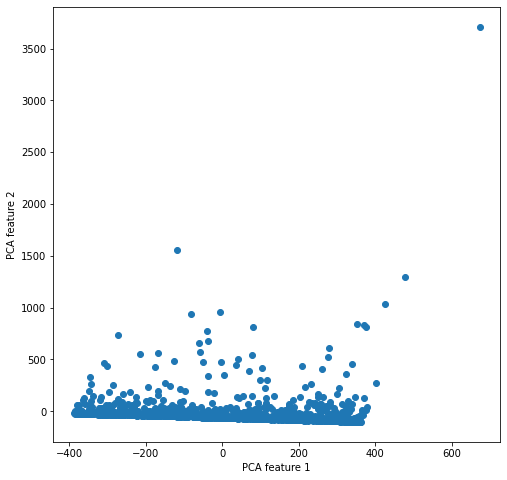

In [99]:
plot_original_data(X[:100])

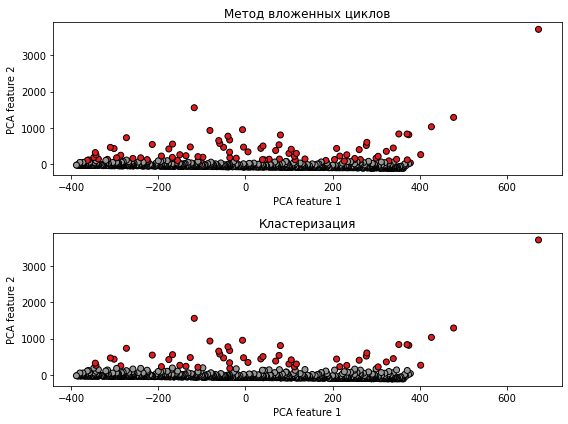

In [112]:
execute_data(X[:100])

In [113]:
data2 = pd.read_csv('./drive/MyDrive/Mall_Customers.csv')
data2=data2.drop('CustomerID',axis=1)
data2=data2.rename(columns={
 'Annual Income (k$)':'Income',
 'Spending Score (1–100)':'Spend_Score'})
data2=pd.get_dummies(data2)

In [114]:
X = process_data(data2)

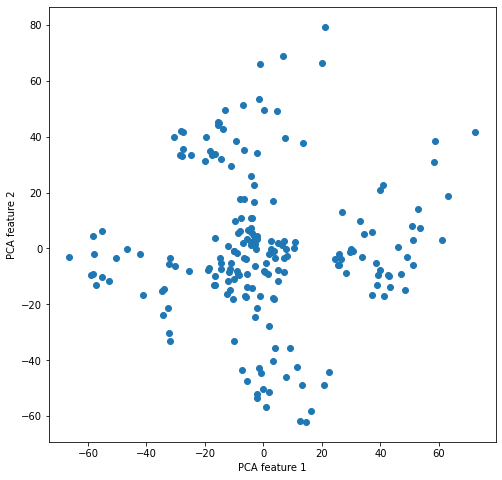

In [121]:
plot_original_data(X)

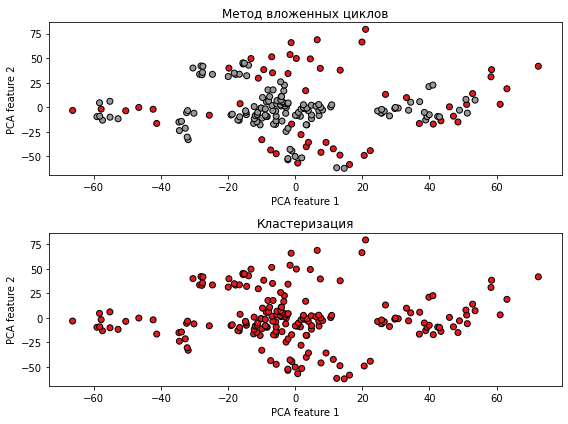

In [165]:
execute_data(X, 4, 100, 0.001)

In [168]:
data3 = pd.read_csv('./drive/MyDrive/daily-minimum-temperatures-in-me.csv', error_bad_lines=False).rename(columns={'Date': 'date', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'temperature'})

b'Skipping line 3653: expected 2 fields, saw 3\n'


In [52]:
data3.dtypes

date           datetime64[ns]
temperature           float64
dtype: object

In [169]:
data3["temperature"] = pd.to_numeric(data3["temperature"], errors='coerce').dropna()
data3["date"] = pd.to_datetime(data3["date"], errors='coerce').dropna()

In [170]:
data3 = data3.groupby(['date']).mean()

In [171]:
X = np.array(data3)

In [84]:
def plot_original_time_data(data):
  # data = data.iloc[:100].sort_values(['temperature'], ascending=[False])
  dates = data.index
  data = np.array(data)
  # dates = pd.date_range(start = '1981-01-01', end = '1990-12-31').to_list()
  plt.figure(figsize = (16, 6))
  plt.plot(dates[:300], data[:300], 'g')
  plt.xlabel('Date')
  plt.ylabel('Temperature')
  plt.xticks(rotation = 90)
  plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
  plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
  plt.show()

In [166]:
def execute_time_data(data):
  wsize = 24
  k = 4

  profile = mp.compute(data.squeeze(), wsize)
  profile = mp.discover.discords(profile, exclusion_zone = wsize, k = k)
  mp.visualize(profile)
  plt.show()

  mp_adjusted = np.append(profile['mp'], np.zeros(profile['w'] - 1) + np.nan)
  fig, ax = plt.subplots(1, 1, sharex = True, figsize = (16, 6))
  ax.plot(np.arange(len(profile['data']['ts'])), profile['data']['ts'])
  ax.set_title('Highlighted anomaly')
  ax.set_xlabel('Time')
  ax.set_ylabel('Unemployment')
  ax.set_xticks([])
  ax.set_yticks([])
  flag = 1
  for discord in profile['discords']:
      x = np.arange(discord, discord + profile['w'])
      y = profile['data']['ts'][discord:discord + profile['w']]
      if flag:
          ax.plot(x, y, c = 'r',label = "Discord")
          flag = 0
      else:
          ax.plot(x, y, c = 'r')
  plt.legend()
  plt.show()

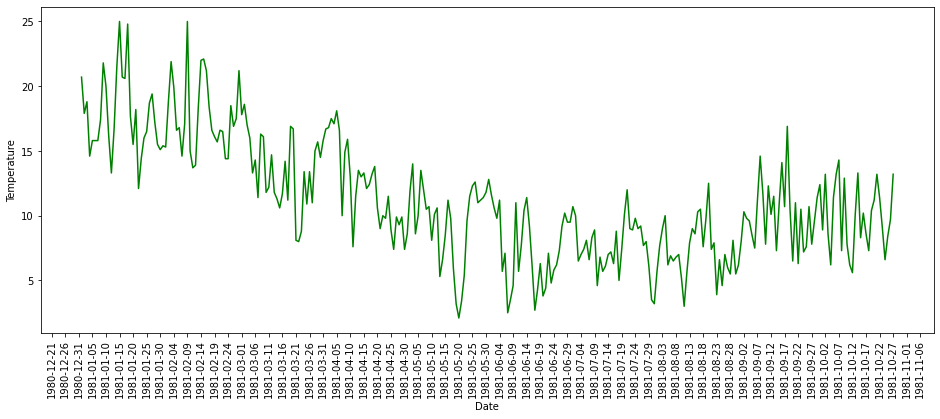

In [85]:
plot_original_time_data(data3)

/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


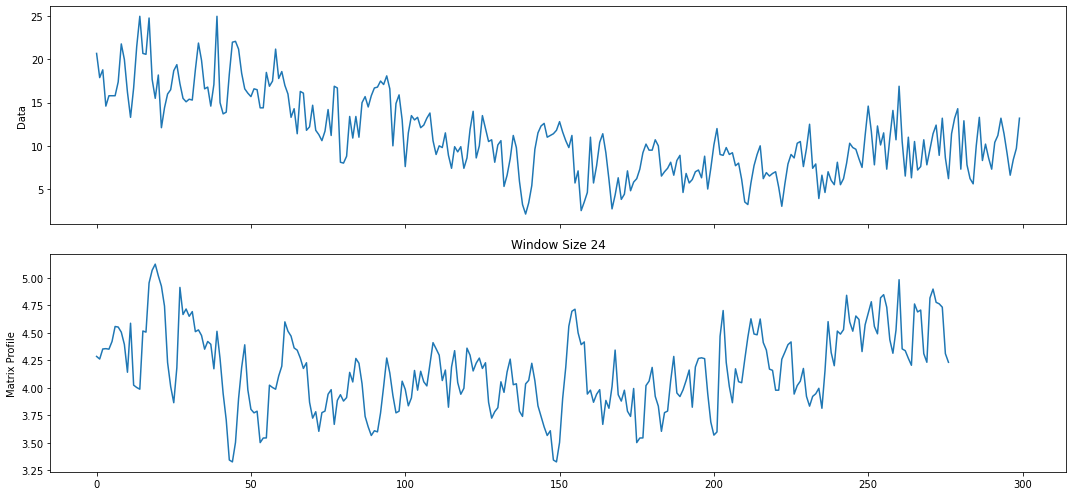

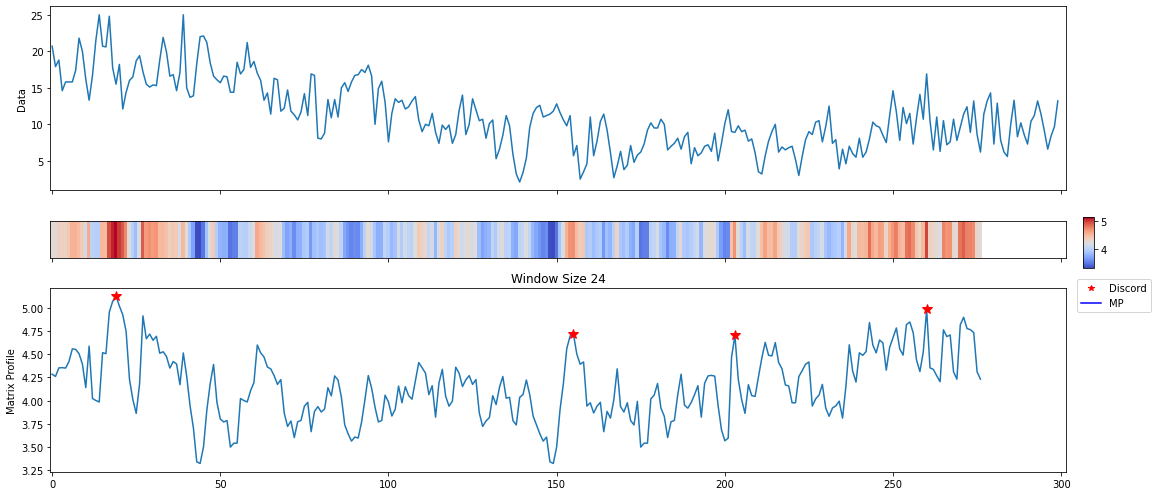

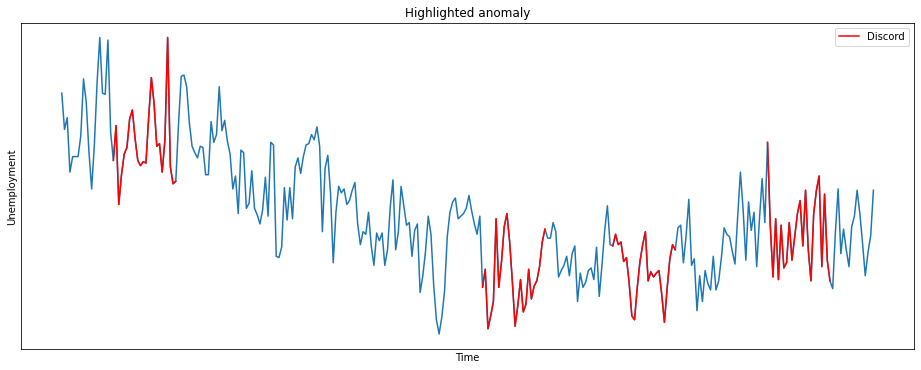

In [172]:
execute_time_data(X[:300])